In [244]:
# This code has been adopted from Niklas Donges' work (ref.1) 
# and modified to tailor to this data set and specified some missing hyper parameters 
# for some of the AI models as described below. Also sections of code developed by Ken Jee (ref.2)
# is incorporated in this notebook to explore the given data (numerical and categorical features).

  # 1. In the given training data additionally there is missing value for 'Fare', which was imputed 
  #    from the median value of subset of fares based on the associated Pclass, Embarked, not_alone and Deck feature values.
  # 2. The hyperparameters for Logistic, Perceptron, and Lnear Support Vector Classifier (SVC)
  #    are either specified or fine tuned to improve convergence and remove 
  #    associated warnings in the original models.

#Ref: 1. https://www.kaggle.com/niklasdonges/end-to-end-project-with-python/
#     2. https://www.kaggle.com/kenjee/titanic-project-example

In [245]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

In [246]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [247]:
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [248]:
import os
#THIS_FOLDER = os.path.dirname(os.path.abspath(__file__))
#my_file = os.path.join(THIS_FOLDER, "Testing.csv")
os.chdir(r"C:\Users\tvsom\Documents\Anitej\Rutgers\research\Aresty 2021-22\ML-Genetic-Research\Titanic\Titanic1")
test_df = pd.read_csv(r"C:\Users\tvsom\Documents\Anitej\Rutgers\research\Aresty 2021-22\ML-Genetic-Research\Titanic\Titanic1\Testing.csv")
train_df = pd.read_csv(r"C:\Users\tvsom\Documents\Anitej\Rutgers\research\Aresty 2021-22\ML-Genetic-Research\Titanic\Titanic1\Training.csv")

In [249]:
# Explore data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          707 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        216 non-null    object 
 11  Embarked     890 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [250]:
#The training-set has 891 examples and 11 features (5 numeric and 6 categorical) + the target 

train_df.describe()
# We can see that the survival rate in the training data is about 38%.
# We can also see that the passenger ages range from 0.17 to 80 years.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,707.000000,891.000000,891.000000,890.000000
mean,446.000000,0.381594,2.257015,30.435526,0.510662,0.371493,33.721586
std,257.353842,0.486051,0.849417,14.793572,1.113073,0.840035,52.292482
min,1.000000,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,668.500000,1.000000,3.000000,40.000000,1.000000,0.000000,31.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [251]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,675,75.8
Age,184,20.7
Embarked,1,0.1
Fare,1,0.1
Ticket,0,0.0


In [252]:
# ‘Age’ and 'Cabin' has several missing data, which need to be either removed or imputed.
# In addition 'Fare' and 'Embarked' features each have a missing value that needs to be addressed.

# get the feature names
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

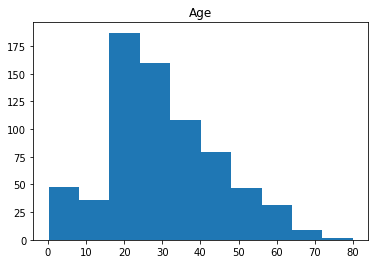

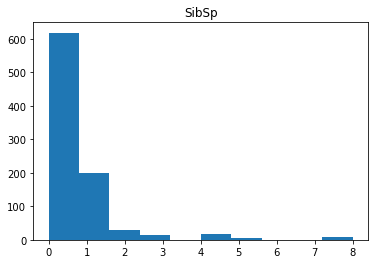

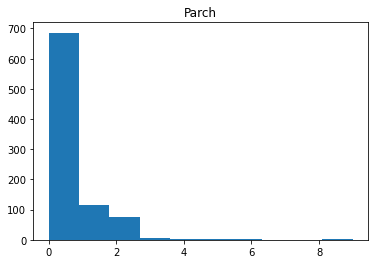

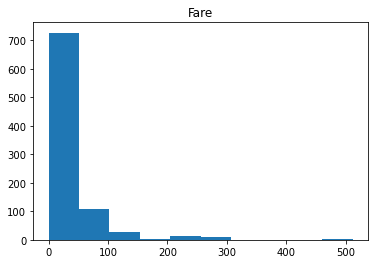

In [253]:
# Analyze numeric and categorical values separately
df_num = train_df[['Age','SibSp','Parch','Fare']]
df_cat = train_df[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

#distributions for all numeric variables (histograms)
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

In [254]:
# Age has normal distribution whereas SibSp, Parch and Fare are skewed to the right.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.263080 -0.156331  0.194214
SibSp -0.263080  1.000000  0.400125  0.165485
Parch -0.156331  0.400125  1.000000  0.232991
Fare   0.194214  0.165485  0.232991  1.000000


<AxesSubplot:>

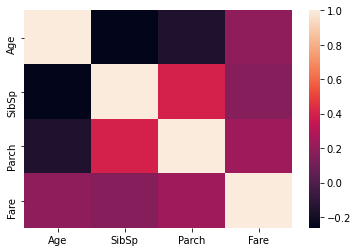

In [255]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [256]:
# Features SinSp and Parch are positively correlated and Age is 
# negatively correlated with both Parch and SipSp
# In regression models these correlated features may cause multicollinearity

In [257]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(train_df, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.628448,24.669438,0.312160,0.560799
1,30.148181,48.364767,0.467647,0.429412


In [258]:
# The above table indicates, younger people have higher survivability, so also people who paid higher fare.
# Those with parents have a slightly higher survival rates.

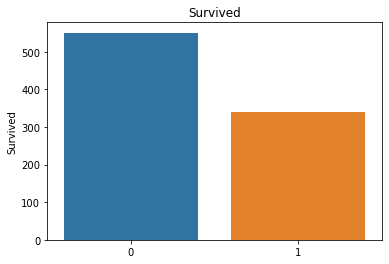

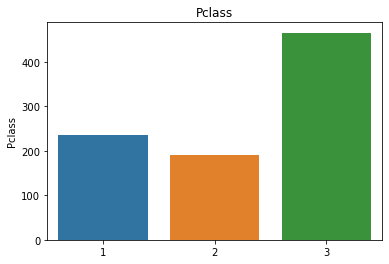

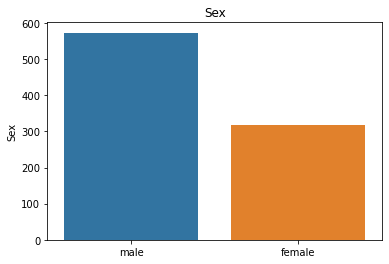

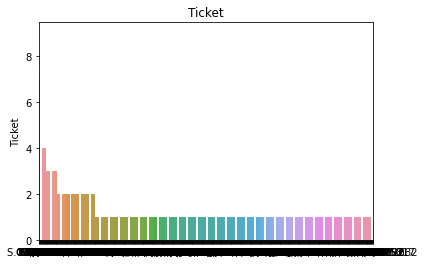

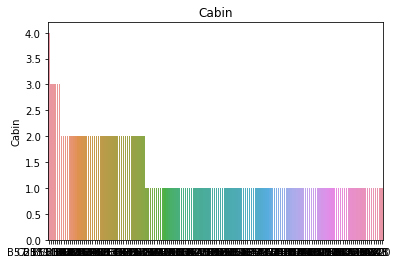

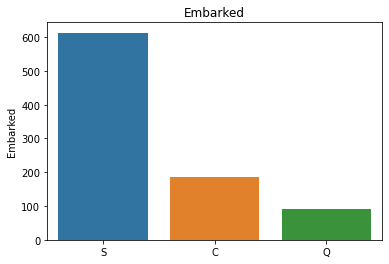

In [259]:
for i in df_cat.columns:
    x = df_cat[i].value_counts().index
    y = df_cat[i].value_counts()
    sns.barplot(x=x, y=y).set_title(i)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

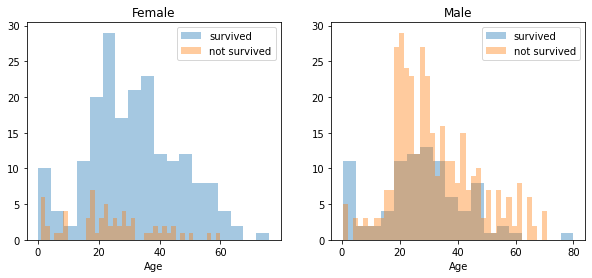

In [260]:
# Feature Analysis:
# 1 Age and Sex:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

In [261]:
# You can see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not fully. 
# For women the survival chances are higher between 14 and 40
# Another thing to note is that infants also have a little bit higher probability of survival.

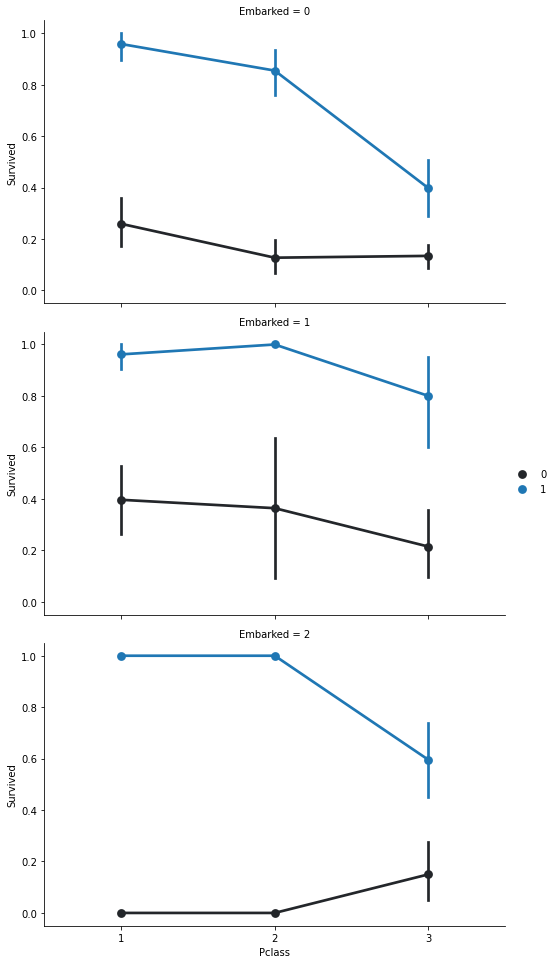

In [308]:
# 2. Embarked, Pclass and Sex:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [263]:
# 'Embarked' seems to be correlated with survival, depending on the gender.
# Women embarked at port Q and on port S have a higher chance of survival. 
# Men have a high survival probability if they embarked at port C, compared to those embarked at port Q or S.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

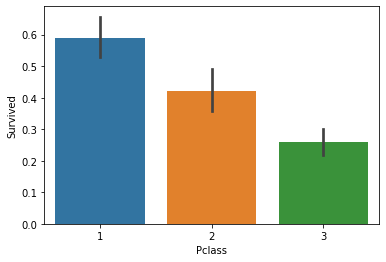

In [264]:
# 4. Pclass:
sns.barplot(x='Pclass', y='Survived', data=train_df)

# Below plot indicates higher survival rate for those with Pclass of 1

In [265]:
# 5. SibSp and Parch:
#SibSp and Parch are combined to give the total number of relatives, a person has on the Titanic. 
# Below a feature has been created and it indicates if a person is not alone.
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    550
0    341
Name: not_alone, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


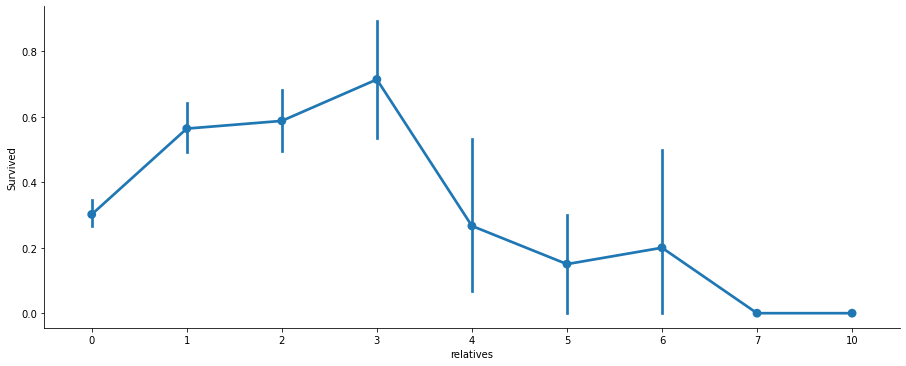

In [266]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

In [267]:
# The above plot shows an higher probabilty of survival for a person with 1 to 3 realitves, 
# but a lower one if he/she had less than 1 or more than 3 relatives

In [268]:
# Feature Processing and Engineering:
# First drop the 'PassengerId' from the training set as it does not contribute to a person's
# survival probablility. It is retained in the test set as it is required in the result set.
train_df = train_df.drop(['PassengerId'], axis=1)

In [269]:
# Missing Data:
#Cabin:
# A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature.
# Afterwords we will convert the feature into a numeric variable. The missing values will be 
# converted to zero.
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [270]:
# Only one Fare value is missing in the training data set. Since the fares are not normally distributed
# with some zeros and some very high values, median value is imputed for it from the subset of fares based on
# Pclass, Embarked, not_alone and Deck features.
#data = [train_df, test_df]
#for dataset in data:
median = train_df[(train_df['Pclass']==3) & (train_df['Embarked']=='S') & (train_df['not_alone']==1) & (train_df['Deck']==8)]['Fare'].median()
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(median)

train_df["Fare"].isnull().sum()

0

In [271]:
# For age feature missing values, first an array of contains random numbers are created, 
# which are computed based on the mean age value in regards to the standard deviation and is_null.
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

In [272]:
# Embarked feature
train_df['Embarked'].describe()

count     890
unique      3
top         S
freq      613
Name: Embarked, dtype: object

In [273]:
# Embarked has only one missing value, and hence it is filled with most common value.
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [274]:
# Data type conversions
# Fare: Convert from float to int64 using astype()
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [275]:
# Titles are created from the Name and a new feature is built.
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [276]:
# Convert 'Sex' feature into numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [277]:
# Ticket feature:
train_df['Ticket'].describe()

count          891
unique         704
top       CA. 2343
freq             9
Name: Ticket, dtype: object

In [278]:
# Since it has 704 unique values, it is dropped from the data sets
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [279]:
# Convert Embarked feature into numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [280]:
# Create groups for Age feature
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# Check distribution
train_df['Age'].value_counts()

6    180
4    159
3    145
5    137
2    125
1     85
0     60
Name: Age, dtype: int64

In [281]:
# Create groups for fare
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [282]:
# Create new features
# 1. Age times class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [283]:
# 2. Fare per Person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [284]:
# Check final data
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,1,0,5,0,1,2,1,1,0,3,1,5,1
1,0,3,0,4,0,0,1,0,0,1,8,1,12,1
2,1,1,1,6,1,0,3,1,1,0,3,3,6,1
3,0,1,0,6,1,0,3,0,1,0,3,1,6,1
4,0,3,0,2,0,0,0,0,0,1,8,1,6,0
5,0,3,0,6,0,0,1,0,0,1,8,1,18,1
6,1,1,1,6,1,0,3,0,1,0,4,2,6,1
7,0,3,1,2,1,0,1,0,1,0,8,2,6,0
8,0,1,0,6,0,0,3,1,0,1,1,1,6,3
9,0,3,0,2,0,0,1,2,0,1,8,1,6,1


In [285]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [286]:
# Machine Learning Models

In [287]:
# stochastic gradient descent (SGD) model
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [288]:
# Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [289]:
# Logistic Regression model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [290]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [291]:
# Gaussian Naive Bayes model
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [292]:
# Perceptron model
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [293]:
# Linear SVC model
linear_svc = LinearSVC(random_state=None, tol=1e-2, max_iter=10000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [294]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [295]:
# Compare Prediction Scores from different models
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
91.69,Random Forest
91.69,Decision Tree
84.96,KNN
80.70,Logistic Regression
80.58,Support Vector Machines
79.24,Perceptron
77.55,Stochastic Gradient Decent
76.43,Naive Bayes


In [296]:
# Random Forests is the best model for this work.

In [297]:
# K-fold cross validation is performed with 10 folds to to train and evaluate
# Random Forest Classifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.7752809  0.82022472 0.74157303 0.79775281 0.79775281
 0.84269663 0.83146067 0.74157303 0.7752809 ]
Mean: 0.7901373283395756
Standard Deviation: 0.032867169182679866


In [298]:
# The above Randome Forest model has an average accuracy of 79% with a standard deviation of 3.3%. 
# The standard deviation informs how precise the estimates are.
# the accuracy of the above model can differ + - 3.28%.

In [299]:
# Feature importance is determined below to remove any unnecessary features
# that might be contributing to overfitting and to reduce impurity on average
# across all trees in the forest

In [300]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.196
Title,0.176
Age_Class,0.092
Deck,0.087
Age,0.078
Pclass,0.065
Fare,0.062
Embarked,0.060
relatives,0.055


<AxesSubplot:xlabel='feature'>

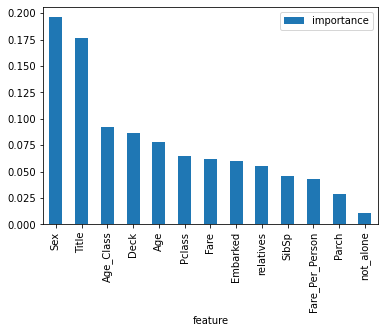

In [301]:
importances.plot.bar()

In [302]:
# not_alone and Parch features do not play a significant role in the the random forest classifier predictions.
# both these features are removed from training and test data sets.

train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [303]:
# Train Random Forest again

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

final_data = {'PassengerId': test_df['PassengerId'], 'Survived': Y_prediction}
df = pd.DataFrame(data=final_data)
df.set_index('PassengerId')
df.to_csv(r"C:\Users\tvsom\Documents\Anitej\Rutgers\research\Aresty 2021-22\ML-Genetic-Research\Titanic\Titanic1\results2.csv", index=False)

91.69 %


In [304]:
# The overall prediction score for the final Random Forest model is 91.69%
# And the results are written to csv file and submitted for this model.

In [305]:
# Evaluate random-forest classifier using out-of-bag sample:
# The oob score estimates generalization accuracy of the model

In [306]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 80.02 %


In [307]:
# Hyperparameter Tuning for: criterion, min_samples_leaf, min_samples_split and n_estimators
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 5,
 'min_samples_split': 35,
 'n_estimators': 100}

In [309]:
# Random Forest with the new parameters
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 5, 
                                       min_samples_split = 35,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.37 %


In [ ]:
# The generalization accuracy of this fine tuned model is 81.37%